# Dataset Coffee Quality

## About Dataset
Coffee Quality Institute
The Coffee Quality Institute (CQI) is a non-profit organization that works to improve the quality and value of coffee worldwide. It was founded in 1996 and has its headquarters in California, USA.

CQI's mission is to promote coffee quality through a range of activities that include research, training, and certification programs. The organization works with coffee growers, processors, roasters, and other stakeholders to improve coffee quality standards, promote sustainability, and support the development of the specialty coffee industry.

## Data
CQI maintains a web database that serves as a resource for coffee professionals and enthusiasts who are interested in learning about coffee quality and sustainability. The database includes a range of information on coffee production, processing, and sensory evaluation. It also contains data on coffee genetics, soil types, and other factors that can affect coffee quality.

## Sensory evaluations (coffee quality scores)
    Aroma: Refers to the scent or fragrance of the coffee.
    Flavor: The flavor of coffee is evaluated based on the taste, including any sweetness, bitterness, acidity, and other flavor notes.
    Aftertaste: Refers to the lingering taste that remains in the mouth after swallowing the coffee.
    Acidity: Acidity in coffee refers to the brightness or liveliness of the taste.
    Body: The body of coffee refers to the thickness or viscosity of the coffee in the mouth.
    Balance: Balance refers to how well the different flavor components of the coffee work together.
    Uniformity: Uniformity refers to the consistency of the coffee from cup to cup.
    Clean Cup: A clean cup refers to a coffee that is free of any off-flavors or defects, such as sourness, mustiness, or staleness.
    Sweetness: It can be described as caramel-like, fruity, or floral, and is a desirable quality in coffee.

## Defects
Defects are undesirable qualities that can occur in coffee beans during processing or storage. Defects can be categorized into two categories: Category One and Category Two defects.

Category One defects are primary defects that can be perceived through visual inspection of the coffee beans. These defects include: Black beans, sour beans, insect-damaged beans, fungus-damaged beans etc.

Category Two defects are secondary defects that are more subtle and can only be detected through tasting. These defects include: Over-fermentation, staleness, rancidness, chemical taste etc.

## Data Scraping
On this part, great thanks to James LeDoux. His repo coffee-quality-database from 2018 is efficiently written and well documented. To scrape the data, I used most of his code, but due to some changes on the website, I modified some of the lines. Also, some practices on modules were deprecated and deleted so I updated those codes also. Therefore, on May-2023 we can use this updated python program to scrape data from this database. You can find my repo on https://github.com/fatih-boyar/coffee-quality-data-CQI/tree/main

Only data collected for the arabica type. With a few modification in scraper_bot.py, scraping can be easily replicated for robusta types also.

Data Source: https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi

Imports, format load
shape, column names, drop unwanted columns
Dtype, change Dtype, isna - clean


In [447]:
import pandas as pd
import numpy as np
import plotly.express as px

In [448]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [449]:
pd.options.display.float_format = '{:,.0f}'.format

In [450]:
df = pd.read_csv('arabica.csv')

In [451]:
df.shape

(207, 41)

In [452]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [453]:
df.columns

Index(['ID', 'Country of Origin', 'Farm Name', 'Lot Number', 'Mill',
       'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [454]:
print(f'Are there any NaN values?: {df.isna().values.any()}')

Are there any NaN values?: True


In [455]:
df.fillna(0, inplace=True)

In [456]:
print(f'Are there any NaN values?: {df.isna().values.any()}')

Are there any NaN values?: False


In [457]:
df.head(3)

,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,0,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,9,8,8,9,8,8,10,10,10,9,0,89,12,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,0,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8,8,8,8,8,8,10,10,10,8,0,88,10,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,0,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8,8,8,8,8,8,10,10,10,8,0,87,10,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"


In [458]:
df[['Bag Weight in kg', 'in kg']] = df['Bag Weight'].apply(lambda x: pd.Series(str(x).split(" "))) 
df.drop(columns=['in kg'], inplace=True)
df.drop(columns=['Bag Weight'], inplace=True)
df = df.astype({'Bag Weight in kg': float})

In [459]:
df['Altitude'][99] = ('4895 - 5650')
df['Altitude'][180] = ('1200 - 1600')

C:\Users\Silvia\AppData\Local\Temp\ipykernel_17524\3160683059.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Silvia\AppData\Local\Temp\ipykernel_17524\3160683059.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [460]:
df[['Altitude_from', 'Altitude_up_to']] = df['Altitude'].apply(lambda x: pd.Series(str(x).split('-')))
df = df.astype({'Altitude_up_to': float})
df = df.astype({'Altitude_from': float})

In [461]:
df = df[['ID', 'Country of Origin', 'Region', 'Producer','Owner', 'Farm Name', 'Altitude', 'Altitude_from', 'Altitude_up_to', 'Number of Bags', 'Bag Weight in kg','Mill', 'Harvest Year','Grading Date', 'Variety', 'Status', 'Processing Method', 'Aroma','Flavor','Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Color', 'Category Two Defects', 'Expiration', 'Certification Body', 'Certification Address', 'Certification Contact', 'Company', 'In-Country Partner','Lot Number', 'ICO Number']]

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     207 non-null    int64  
 1   Country of Origin      207 non-null    object 
 2   Region                 207 non-null    object 
 3   Producer               207 non-null    object 
 4   Owner                  207 non-null    object 
 5   Farm Name              207 non-null    object 
 6   Altitude               207 non-null    object 
 7   Altitude_from          207 non-null    float64
 8   Altitude_up_to         50 non-null     float64
 9   Number of Bags         207 non-null    int64  
 10  Bag Weight in kg       207 non-null    float64
 11  Mill                   207 non-null    object 
 12  Harvest Year           207 non-null    object 
 13  Grading Date           207 non-null    object 
 14  Variety                207 non-null    object 
 15  Status

In [463]:
df.columns

Index(['ID', 'Country of Origin', 'Region', 'Producer', 'Owner', 'Farm Name',
       'Altitude', 'Altitude_from', 'Altitude_up_to', 'Number of Bags',
       'Bag Weight in kg', 'Mill', 'Harvest Year', 'Grading Date', 'Variety',
       'Status', 'Processing Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness',
       'Overall', 'Defects', 'Total Cup Points', 'Moisture Percentage',
       'Category One Defects', 'Quakers', 'Color', 'Category Two Defects',
       'Expiration', 'Certification Body', 'Certification Address',
       'Certification Contact', 'Company', 'In-Country Partner', 'Lot Number',
       'ICO Number'],
      dtype='object')

In [464]:
df.insert(11, 'Coffee_Sold_in_kg', df['Number of Bags'] * df['Bag Weight in kg'])

In [465]:
df['Altitude_up_to'] = df['Altitude_up_to'].fillna(df.pop('Altitude'))

In [466]:
df = df.astype({'Altitude_up_to': float})

In [467]:
df.head(3)

,ID,Country of Origin,Region,Producer,Owner,Farm Name,Altitude_from,Altitude_up_to,Number of Bags,Bag Weight in kg,Coffee_Sold_in_kg,Mill,Harvest Year,Grading Date,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact,Company,In-Country Partner,Lot Number,ICO Number
0,0,Colombia,"Piendamo,Cauca",Diego Samuel Bermudez,Coffee Quality Union,Finca El Paraiso,"1,700","1,930",1,35,35,Finca El Paraiso,2021 / 2022,"September 21st, 2022",Castillo,Completed,Double Anaerobic Washed,9,8,8,9,8,8,10,10,10,9,0,89,12,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,Coffee Quality Union,Japan Coffee Exchange,CQU2022015,0
1,1,Taiwan,Chiayi,曾福森,Taiwan Coffee Laboratory 台灣咖啡研究室,Royal Bean Geisha Estate,"1,200","1,200",1,80,80,Royal Bean Geisha Estate,2021 / 2022,"November 15th, 2022",Gesha,Completed,Washed / Wet,8,8,8,8,8,8,10,10,10,8,0,88,10,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",Taiwan Coffee Laboratory,Taiwan Coffee Laboratory 台灣咖啡研究室,"The 2022 Pacific Rim Coffee Summit,T037",0
2,2,Laos,Laos Borofen Plateau,WU TAO CHI,Taiwan Coffee Laboratory 台灣咖啡研究室,OKLAO coffee farms,"1,300","1,300",19,25,475,oklao coffee processing plant,2021 / 2022,"November 15th, 2022",Java,Completed,Semi Washed,8,8,8,8,8,8,10,10,10,8,0,87,10,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",Taiwan Coffee Laboratory,Taiwan Coffee Laboratory 台灣咖啡研究室,"The 2022 Pacific Rim Coffee Summit,LA01",0


# Top Exporters of Coffee

### Comment
#### In this dataset, we analyse data from 207 sales. The dominant country in sales is Ethiopia, which makes 89.5% of overall volume. The top three also inclues Brazil and Guatemala.

In [468]:
df_country = (
    df
    .groupby('Country of Origin').agg({'Coffee_Sold_in_kg': ['sum']})
    .droplevel(1, axis='columns')
    .sort_values('Coffee_Sold_in_kg', ascending=False)
)

df_country.head(10)

,Coffee_Sold_in_kg
Country of Origin,
Ethiopia,"12,389,860"
Brazil,"320,325"
Guatemala,"245,370"
Honduras,"170,490"
Colombia,"161,512"
"Tanzania, United Republic Of","94,200"
Nicaragua,"93,630"
Costa Rica,"71,014"
Peru,"56,940"


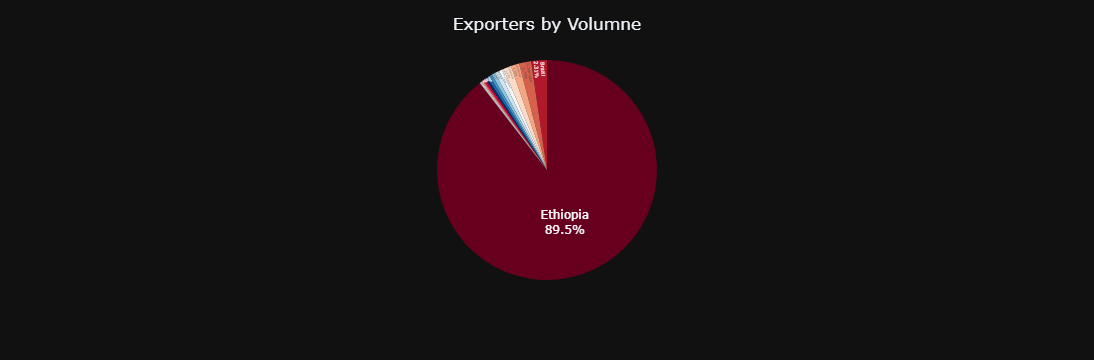

In [469]:
fig = (
    px.pie(df, values='Coffee_Sold_in_kg', names='Country of Origin', color_discrete_sequence=px.colors.sequential.RdBu)
    .update_layout(
        title='Exporters by Volumne',
        title_x=0.5,
        template='plotly_dark',
        showlegend=False,
    )
    .update_traces(
        textposition='inside',
        textinfo='percent+label',
    )
)
fig.show()

# Top 3 Exporters by Volume

In [470]:
df_country.head(3)

,Coffee_Sold_in_kg
Country of Origin,
Ethiopia,"12,389,860"
Brazil,"320,325"
Guatemala,"245,370"


# Most Sold Variety

### Comment
#### The most popular variety is Ethiopian Heirlooms, which is not surprising, as Ethiopia dominates in this dataset. The other popular varieties are: Caturra,  Mundo Novo, Burbon and Catuai.

In [471]:
df_variety = (
    df
    .groupby('Variety').agg({'Coffee_Sold_in_kg': ['sum']})
    .droplevel(1, axis='columns')
    .sort_values('Coffee_Sold_in_kg', ascending=False)
)

df_variety.head()

,Coffee_Sold_in_kg
Variety,
Ethiopian Heirlooms,"12,387,420"
Caturra,"375,781"
Mundo Novo,"246,600"
Bourbon,"199,288"
Catuai,"176,860"


# Where is coffee grown in the highest altitude?

### Comment
#### Countries such as Guatemala and Vietnam grow coffee in high altitudes that reach up to 5650 meters above sea level.

In [472]:
df_altitude = (
    df
    .sort_values('Altitude_up_to', ascending=False)
)

df_altitude.head(3)

,ID,Country of Origin,Region,Producer,Owner,Farm Name,Altitude_from,Altitude_up_to,Number of Bags,Bag Weight in kg,Coffee_Sold_in_kg,Mill,Harvest Year,Grading Date,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact,Company,In-Country Partner,Lot Number,ICO Number
99,99,Guatemala,ANTIGUA GUATEMALA,"VALBROS, S. A.",Angelica Paola Citan Lopez,SAN RAFAEL URIAS VALDES,"4,895","5,650",635,30,"19,050","BENEFICIO SANTA RITA, S. A.",2021 / 2022,"May 19th, 2022",Bourbon,Completed,Washed / Wet,8,8,8,8,8,8,10,10,10,8,0,84,11,0,1,greenish,4,"May 19th, 2023",Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,Asociación Nacional del Cafe,Asociacion Nacional Del Café,AMNI-22-0905,11/54876/01
182,182,Vietnam,Lam Dong Province,Viet Coffee Company Limited,Rodney Murray,Gaia Farms,"5,400","5,400",1,1,1,Hulling Facility,2022 / 2023,"April 10th, 2023",Catimor,Completed,Pulped natural / honey,8,8,7,7,7,7,10,10,10,7,0,82,11,0,0,green,4,"April 9th, 2024",Firedancer Coffee Consultants,"165 Commerce Drive, Ste 103",Firedancer Coffee Consultants -,Brew Baby Coffee Company,Firedancer Coffee Consultants,221221,0
60,60,Guatemala,ANTIGUA GUATEMALA,"VALBROS, S. A.",Angelica Paola Citan Lopez,SAN RAFAEL URIAS VALDES,"4,895","4,895",66,30,"1,980",ECO COFFEE,2021 / 2022,"May 19th, 2022",Bourbon,Completed,Natural / Dry,8,8,8,8,8,8,10,10,10,8,0,85,11,0,3,yellow-green,2,"May 19th, 2023",Asociacion Nacional Del Café,"5a Calle 0-50, Zona 14 Guatemala City, Guatema...",Brayan Cifuentes -,"VALBROS, S. A.",Asociacion Nacional Del Café,11/54876/03,11/54876/03


# Where is coffee grown in the lowes altitude?

### Comment
#### On the other hand Taiwan grows coffee in the lowes altitude of 140 meters above see level.

In [473]:
df_altitude.tail(4).head(3)

,ID,Country of Origin,Region,Producer,Owner,Farm Name,Altitude_from,Altitude_up_to,Number of Bags,Bag Weight in kg,Coffee_Sold_in_kg,Mill,Harvest Year,Grading Date,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact,Company,In-Country Partner,Lot Number,ICO Number
84,84,Taiwan,新北市,邱建明,Taiwu,竹崙子莊園,150,150,1,110,110,竹崙子莊園,2021 / 2022,"January 6th, 2023",unknown,Completed,Pulped natural / honey,8,8,8,8,8,8,10,10,10,8,0,84,11,0,0,greenish,2,"January 6th, 2024",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",Taiwu Coffee Cooperative,Taiwan Coffee Laboratory 台灣咖啡研究室,A32-Northern Taiwan Specialty Coffee Evaluation,0
167,167,Taiwan,新竹縣,宋煦仁,Taiwu,寶山謐靚,140,140,1,5,5,寶山謐靚,2021 / 2022,"January 6th, 2023",unknown,Completed,Natural / Dry,8,8,7,8,7,7,10,10,10,7,0,82,11,0,0,green,1,"January 6th, 2024",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",Taiwu Coffee Cooperative,Taiwan Coffee Laboratory 台灣咖啡研究室,A48-Northern Taiwan Specialty Coffee Evaluation,0
162,162,Taiwan,新竹縣,胡明杰,Taiwu,弘欣咖啡園,139,139,1,200,200,弘欣咖啡園,2021 / 2022,"January 6th, 2023",unknown,Completed,Washed / Wet,7,7,8,7,8,8,10,10,10,8,0,82,8,0,0,green,2,"January 6th, 2024",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",Taiwu Coffee Cooperative,Taiwan Coffee Laboratory 台灣咖啡研究室,A02-Northern Taiwan Specialty Coffee Evaluation,0


# In what altitude is coffee grown mostly?

### Comment
#### The majority of countries grow coffee in the range of 1200 - 1390 meters above sea level. And the quality of the coffee scores 83.6 out of 100 points.

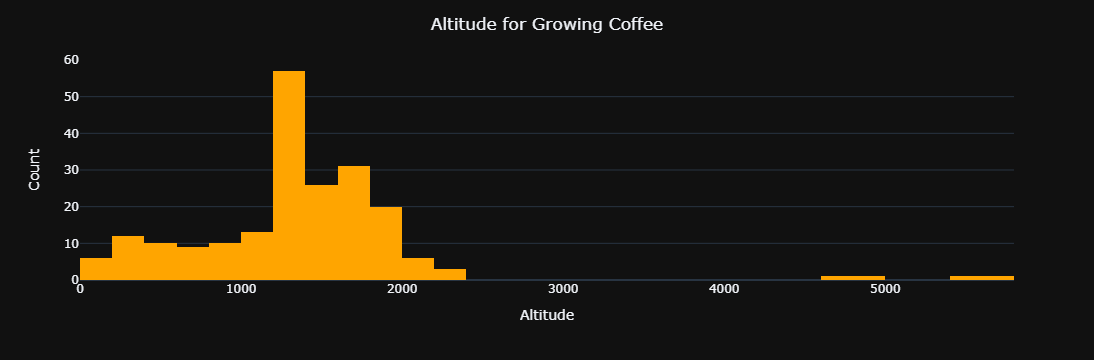

In [474]:
fig = (
    px.histogram(df, x='Altitude_up_to')
    .update_layout(
        title='Altitude for Growing Coffee',
        title_x=0.5,
        xaxis_title='Altitude',
        yaxis_title='Count',
        template = 'plotly_dark'
    )
    .update_traces(
    marker_color='#ffa500'
    )
)
fig.show()

# How does the  coffee score in the altitude from 1200 to 1390 

In [475]:
altitude_from_1200 = df['Altitude_up_to'] >= 1200
altitude_until_1390 = df['Altitude_up_to'] < 1390
filter_condition = altitude_from_1200 & altitude_until_1390

df_common_altitude = df.loc[filter_condition, :].copy()

score_in_filtered_altitude = (
    df_common_altitude
    .sort_values('Total Cup Points')
)
score_in_filtered_altitude['Total Cup Points'].mean().round(1)

83.6

# Coffee from which country scored the highest?

### Comments
#### Ethiopia and Tanzania scored the highest in quality with 85 point. Right behind with 84 points are Taiwan, Guatemala and Madagascar.

In [476]:
df_score_per_country = (
    df
    .pivot_table(index='Country of Origin', aggfunc={'Total Cup Points': 'mean'})
    .round(1)
    .sort_values('Total Cup Points', ascending=False)
)

plot_df_score_per_country = (
    df_score_per_country
    .reset_index()
)

plot_df_score_per_country.head()

,Country of Origin,Total Cup Points
0,Ethiopia,85
1,"Tanzania, United Republic Of",85
2,Taiwan,84
3,Guatemala,84
4,Madagascar,84


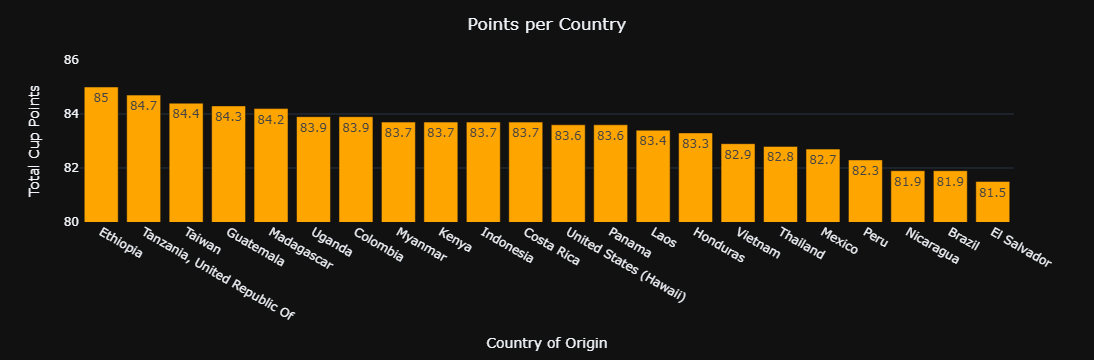

In [477]:
fig = (
    px.bar(plot_df_score_per_country, x='Country of Origin', y='Total Cup Points', text='Total Cup Points')
    .update_layout(
        title='Points per Country',
        title_x=0.5,
        yaxis_range=[80,86],
        template = 'plotly_dark'
    )
    .update_traces(
    marker_color='#ffa500'
    )
)
fig.show()

# Coffee from which altitude scored the highest?

### Comments
#### The best quality coffee in produced in Altitude of 1930 meters above sea level. The top 5 socres range from 1250 to 1930 meters above sea level.

In [478]:
df_score_per_altitude = (
    df
    .pivot_table(index='Altitude_up_to', aggfunc={'Total Cup Points': 'mean'})
    .round(1)
    .sort_values('Total Cup Points', ascending=False)
)
plot_df_score_per_altitude = (
    df_score_per_altitude
    .reset_index()
)

plot_df_score_per_altitude.head()

,Altitude_up_to,Total Cup Points
0,"1,930",89
1,"1,668",87
2,"2,200",86
3,"2,100",86
4,"1,250",86


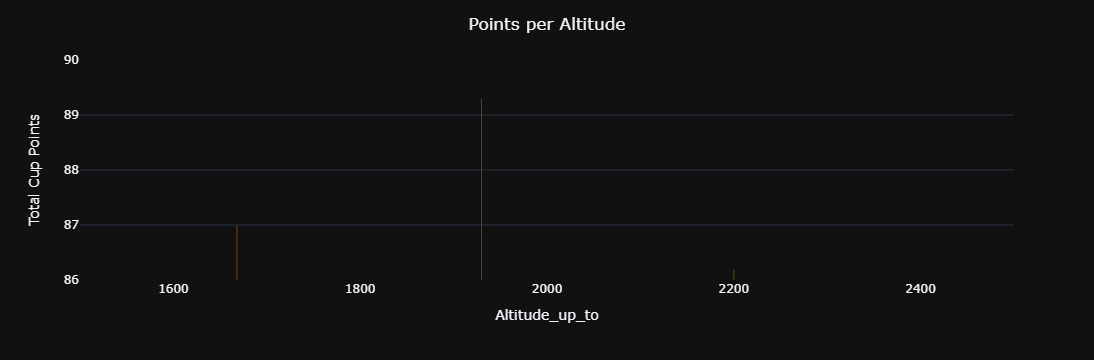

In [479]:
fig1 = (
    px.bar(plot_df_score_per_altitude, x='Altitude_up_to', y='Total Cup Points', text='Total Cup Points')
    .update_layout(
        title='Points per Altitude',
        title_x=0.5,
        xaxis_range=[1500,2500],
        yaxis_range=[86,90],
        template = 'plotly_dark'
    )
    .update_traces(
        marker_color='#ffa500'
    )
)
fig1.show()

# Which coffee variety scored the highest?

### Comments
#### The best coffee variety is undoubtly Castillo, followed by Red Burbon and a blend of SI34 + Gesha.

In [480]:
df_score_per_variety = (
    df
    .pivot_table(index='Variety', aggfunc={'Total Cup Points': 'mean'})
    .round(1)
    .sort_values('Total Cup Points', ascending=False)
)
df_plot_variety = (
    df_score_per_variety
    .reset_index()
)

df_plot_variety.head()

,Variety,Total Cup Points
0,Castillo,89
1,Red Bourbon,87
2,Sl34+Gesha,87
3,"Wolishalo,Kurume,Dega",86
4,Castillo Paraguaycito,86


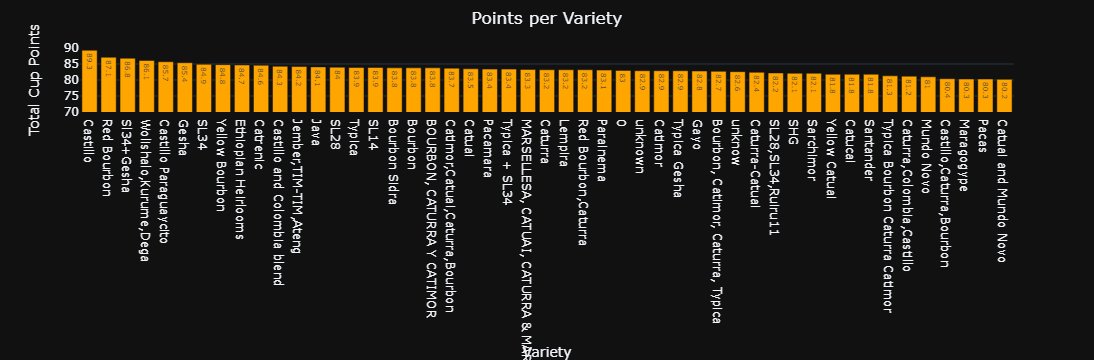

In [481]:
fig = (
    px.bar(df_plot_variety, x='Variety', y='Total Cup Points', text='Total Cup Points')
    .update_layout(
        title='Points per Variety',
        title_x=0.5,
        yaxis_range=[70,90],
        template = 'plotly_dark'
    )
    .update_traces(
    marker_color='#ffa500'
    )
)
fig.show()

In [482]:
df_top_coffee_sorts = df_plot_variety.head(3)
df_top_coffee_sorts

,Variety,Total Cup Points
0,Castillo,89
1,Red Bourbon,87
2,Sl34+Gesha,87


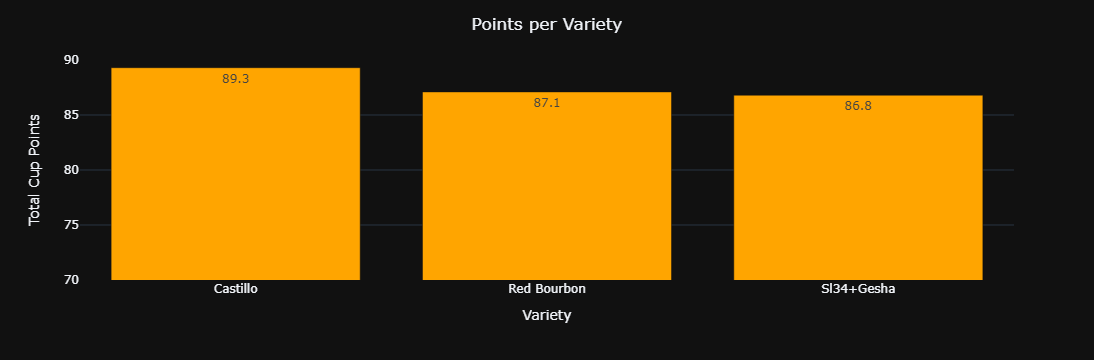

In [483]:
fig = (
    px.bar(df_top_coffee_sorts, x='Variety', y='Total Cup Points', text='Total Cup Points')
    .update_layout(
        title='Points per Variety',
        title_x=0.5,
        yaxis_range=[70,90],
        template = 'plotly_dark'
    )
    .update_traces(
    marker_color='#ffa500'
    )
)
fig.show()

# Points lost in secondary defects

### Comments
#### Secondary defects can only be detected through tasting. These defects include: Over-fermentation, staleness, rancidness, chemical taste etc. The most defects 8 out of 10 were find in variety Sarchimor. Followed by Pecas and Maragogype that lost 7 points.

In [484]:
df_category_two_defects_per_variety = (
    df
    .pivot_table(index='Variety', aggfunc={'Category Two Defects': 'mean'})
    .round(1)
    .sort_values('Category Two Defects', ascending=False)
)

df_plot_variety_category_two_defects = (
    df_category_two_defects_per_variety
    .reset_index()
)

df_plot_variety_category_two_defects.head()

,Variety,Category Two Defects
0,Sarchimor,8
1,Pacas,7
2,Maragogype,7
3,SHG,6
4,Ethiopian Heirlooms,5


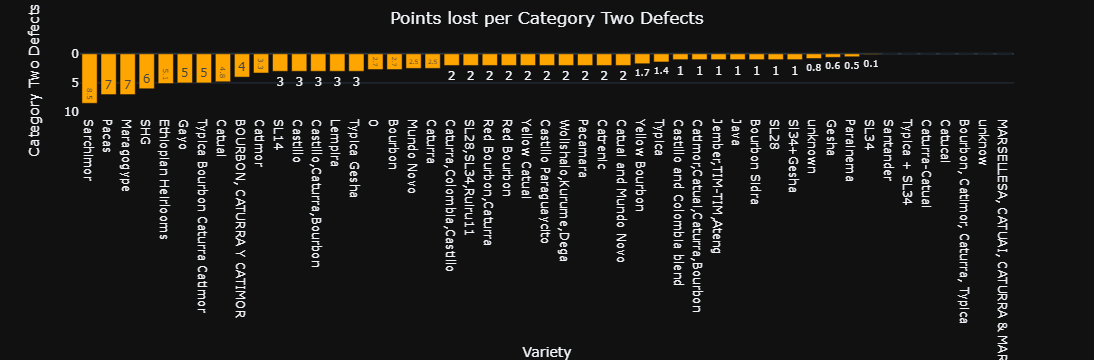

In [485]:
fig = (
    px.bar(df_plot_variety_category_two_defects, x='Variety', y='Category Two Defects', text='Category Two Defects')
    .update_layout(
        title='Points lost per Category Two Defects',
        title_x=0.5,
        yaxis_range=[10,-1],
        template = 'plotly_dark'
    )
    .update_traces(
    marker_color='#ffa500'
    )
)
fig.show()

# Where do producers loose most points in cupping?

### Comments
#### There is not one area where coffee scores way lower than in others.

In [486]:
new_cols = ['Variety', 'Aroma','Flavor','Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects', 'Total Cup Points']
df_cupping = df[new_cols]

In [487]:
df_cupping.describe()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points
count,207,207,207,207,207,207,207,207,207,207,207,207
mean,8,8,8,8,8,8,10,10,10,8,0,84
std,0,0,0,0,0,0,0,0,0,0,0,2
min,6,7,7,7,7,7,9,10,10,7,0,78
25%,8,8,7,8,8,8,10,10,10,8,0,83
50%,8,8,8,8,8,8,10,10,10,8,0,84
75%,8,8,8,8,8,8,10,10,10,8,0,85
max,9,8,8,9,8,8,10,10,10,9,0,89


# Low sales but high quality?

### Comments
#### The coffee varieties that are not sold in large quantities. but scored high are Gesha, SL34 Yellow Burbon and Catrenic.

In [488]:
low_sales_high_quality = (
    df
    .groupby('Variety').agg({'Coffee_Sold_in_kg': ['sum'], 'Total Cup Points': ['mean']})
    .droplevel(1, axis='columns')
    .sort_values('Coffee_Sold_in_kg', ascending=False)
    .sort_values('Total Cup Points', ascending=False)
    .query('Coffee_Sold_in_kg < 10000 & Coffee_Sold_in_kg > 100')
)


plot_low_sales_high_quality = (
    df_low_sales_high_quality
    .reset_index()
)

plot_low_sales_high_quality.head()

,Variety,Coffee_Sold_in_kg,Total Cup Points
0,Gesha,"4,629",85
1,SL34,649,85
2,Yellow Bourbon,186,85
3,Catrenic,"3,330",85
4,Java,487,84


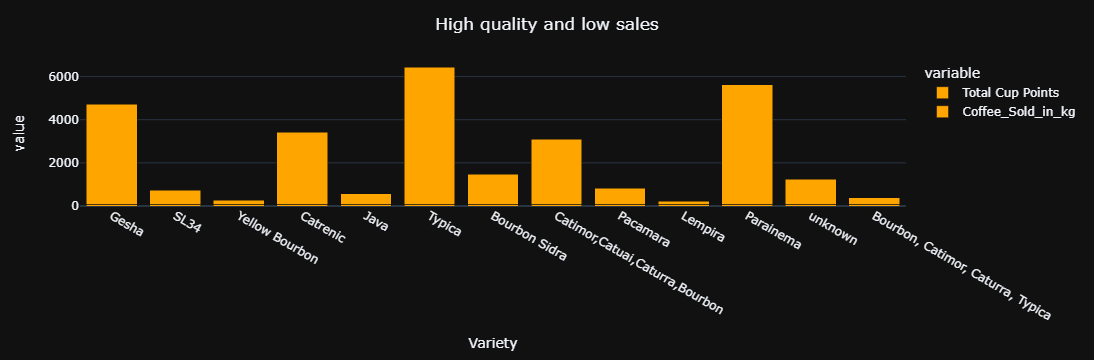

In [489]:
fig = (
    px.bar(plot_low_sales_high_quality, x='Variety', y=['Total Cup Points', 'Coffee_Sold_in_kg'], barmode='stack')
    .update_layout(
        title='High quality and low sales',
        title_x=0.5,
        template = 'plotly_dark',
      )
        .update_traces(
    marker_color='#ffa500'
    )
)

fig.show()

# The most common processing methods

### Comments
#### The most common processing methods are Washed / Wet with 60%, Natural / Dry with 22% and Pulped natural / honey with 12%.

In [490]:
processing_method = (
    df
    .pivot_table(index='Processing Method', aggfunc={'ID': 'count'})
    .round(1)
    .sort_values('ID', ascending=False)
)

plot_processing_method = (
    processing_method
    .reset_index()
)

plot_processing_method.head()

,Processing Method,ID
0,Washed / Wet,124
1,Natural / Dry,46
2,Pulped natural / honey,25
3,0,5
4,Anaerobico 1000h,1


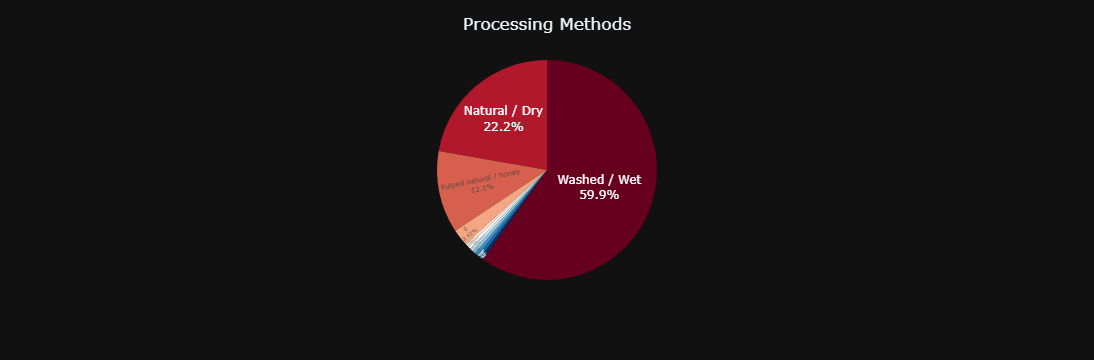

In [491]:
fig_processing_methods = (
    px.pie(plot_processing_method, values='ID', names='Processing Method', color_discrete_sequence=px.colors.sequential.RdBu)
    .update_layout(
        title='Processing Methods',
        title_x=0.5,
        template='plotly_dark',
        showlegend=False,
    )
    .update_traces(
        textposition='inside',
        textinfo='percent+label',
    )
)
fig_processing_methods.show()

In [492]:
processing_methods_per_country = (
    df
    .groupby(['Country of Origin', 'Processing Method']).agg({'Coffee_Sold_in_kg': ['sum'], 'Total Cup Points': ['mean']})
    .droplevel(1, axis='columns')
    .sort_values('Total Cup Points', ascending=False)
    .sort_values('Coffee_Sold_in_kg', ascending=False)
    .query('Coffee_Sold_in_kg > 100')
)
processing_methods_per_country.head(10)

,,Coffee_Sold_in_kg,Total Cup Points
Country of Origin,Processing Method,,
Ethiopia,Washed / Wet,"12,348,760",85
Brazil,Natural / Dry,"282,575",81
Guatemala,Washed / Wet,"225,060",84
Honduras,Washed / Wet,"169,875",83
Colombia,Washed / Wet,"159,974",83
"Tanzania, United Republic Of",Washed / Wet,"94,200",85
Costa Rica,Washed / Wet,"70,714",84
Nicaragua,Washed / Wet,"62,325",81
Peru,Washed / Wet,"56,940",82


In [493]:
# done: how many kg of coffee was sold per row
# done: from which altitude / countries best points were given
# not possible: map variety to more general groups (arabica, robusta)
# done: which arabica variety performed the best
# done: is there a variety that stands out in sensory result
# done: most/least sold varieties
# done: where do coffee producers fail in sensory evaluation / cupping
# done: least sold but tasty - potential
# done: processing method - how many are washed / semiwashed ...
# done: which counties washed / unwasehed come from
# done: is country specialized in one method
